# Chapter 5. BOW 기반의 문서 분류
* 문서 분류: 주어진 문서에 대해 미리 정의된 클래스로 분류하는 작업 
* 분류: 지도학습에 속하며 로지스틱 회귀분석을 비롯해 결정트리, 나이브 베이즈, SVM 등 다양한 머신러닝 방법론들이 존재 
    * 로지스틱 회귀분석 
    * 결정트리 
    * 나이브 베이즈 : 특히 텍스트 분류에 특화
    * SVM  


## 01. 20 뉴스그룹 데이터 준비 및 특성 추출

*  http://scikit-learn.org/0.19/datasets/twenty_newsgroups.html
* 문서 분류의 성능을 측정하기 위해 가장 많이 사용되는 데이터셋 중 하나 
* 유스넷
    * 인터넷에서 이메일과 함께 가장 많이 사용된 서비스 중 하나로 일종의 게시판
    * 여러 뉴스 서버가 있고, 사용자는 이 중 한 서버에 접속해서 하나 이상의 뉴스그룹을 구독 
    * 뉴슥그룹마다 특정 주제가 있으며, 사용자는 그에 맞는 뉴스를 올리거나 읽음 

In [4]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [5]:
pwd()

'/content'

In [6]:
import os
os.chdir('./drive/MyDrive')

In [7]:
!pip install sklearn 

In [8]:
!pip install konlpy

     |████████████████████████████████| 19.4 MB 3.6 MB/s 
     |████████████████████████████████| 448 kB 58.8 MB/s 


In [10]:
!pip install nltk

In [11]:
import nltk 
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [12]:
#----------------------------------------
# 5.1.1 데이터셋 확인 및 분리 

# 20 뉴스 그룹 
    # Ken Lang 연구자가 수집한 자료 
    # 20,000 뉴스 그룹 문서로 이뤄져 있음 
    # scikit-learn 에서 sklearn.datasets.fetch_20newsgroups 모듈 통해 
    # 20 개 토픽/ 분류에 속한 18,000개의 문서를 다운받을 수 있도록 지원 
    
    # 특징 
        # categories 매개변수를 이용해 20개의 topic 중 원하는 토픽 선택할 수 있음 
        # remove 로 필요 없는 데이터를 삭제할 수 있음 
        # 각 데이터셋 내에서, .data는 텍스트의 내용, .target 은 숫자로 표시된 라벨(분류)를 가져오는 데 사용   

# Data set 
    # 보통 하나의 데이터셋을 랜덤하게 분리, 두 데이터셋을 구성 (train, test)
    # 사이킷런, 학습 데이터셋, 평가 데이터셋이 미리 분리돼 있어 서로 다른 기법의 성능을 공정하게 비교 
    # train dataset - 학습 데이터셋
        # 학습모형을 만들 때 사용
        #    
    # test dataset - 평가 데이터셋 
        # 만들어진 학습모형을 평가하는 데 씀 

# headersm footers에 종종 토픽의 이름이 쓰여 있는 경우가 있어 힌트를 배제하기 위해 remove 로 제거 
# subsset 매개변수: 학습, 평가 데이터셋 구분하는데 씀 
# 각 데이터셋의 크기, 라벨 이름, 실젯값 정보 출력 
#----------------------------------------
from sklearn.datasets import fetch_20newsgroups

#20개의 토픽 중 선택하고자 하는 토픽을 리스트로 생성
categories = ['alt.atheism', 'talk.religion.misc', 'comp.graphics', 'sci.space']

#학습 데이터셋을 가져옴
newsgroups_train = fetch_20newsgroups(subset='train',  
#메일 내용에서 hint가 되는 부분을 삭제 - 순수하게 내용만으로 분류
                                      remove=('headers', 'footers', 'quotes'),
                                      categories=categories)
#검증 데이터셋을 가져옴
newsgroups_test = fetch_20newsgroups(subset='test', 
                                     remove=('headers', 'footers', 'quotes'),
                                     categories=categories)

print('#Train set size:', len(newsgroups_train.data))
print('#Test set size:', len(newsgroups_test.data))
print('#Selected categories:', newsgroups_train.target_names)
print('#Train labels:', set(newsgroups_train.target)) # 0,1,2,3 

#Train set size: 2034
#Test set size: 1353
#Selected categories: ['alt.atheism', 'comp.graphics', 'sci.space', 'talk.religion.misc']
#Train labels: {0, 1, 2, 3}


In [13]:
# 학습/평가 데이터 
    # .data : 문서의 (본문)
    # .target : 라벨(토픽)
        # newsgroups_train.target_names : 토픽(라벨) 값 들어 있음
        # 카테고리: 문자열로 된 원래의 값 
            # [alt.atheism, comp.graphics, sci.spcae, talk.religion.misc]
        # 라벨: 이를 숫자로 변환한 값 
            # [0,1,2,3]
        # 해당 순서에 따라 target의 숫자가 정해짐 


print('#Train set text samples:', newsgroups_train.data[0])
print('#Train set label smaples:', newsgroups_train.target[0])
print('#Test set text samples:', newsgroups_test.data[0])
print('#Test set label smaples:', newsgroups_test.target[0])

#Train set text samples: Hi,

I've noticed that if you only save a model (with all your mapping planes
positioned carefully) to a .3DS file that when you reload it after restarting
3DS, they are given a default position and orientation.  But if you save
to a .PRJ file their positions/orientation are preserved.  Does anyone
know why this information is not stored in the .3DS file?  Nothing is
explicitly said in the manual about saving texture rules in the .PRJ file. 
I'd like to be able to read the texture rule information, does anyone have 
the format for the .PRJ file?

Is the .CEL file format available from somewhere?

Rych
#Train set label smaples: 1
#Test set text samples: TRry the SKywatch project in  Arizona.
#Test set label smaples: 2


In [14]:
#----------------------------------------
# 5.1.2 카운트 기반 특성 추출 
# newsgroups_train, newssgroup_test  - .data, .target 이용 
# X_train, X_test, y_train, y_test 추출 
# 특성 추출을 한 후에 실제로 문서 분류를 수행 
#----------------------------------------

X_train = newsgroups_train.data   #학습 데이터셋 문서
y_train = newsgroups_train.target #학습 데이터셋 라벨

X_test = newsgroups_test.data     #검증 데이터셋 문서
y_test = newsgroups_test.target   #검증 데이터셋 라벨

from sklearn.feature_extraction.text import CountVectorizer

# CountVectorizer 객체 생성
    # max_feature: 
        # 특성의 수 2,000개로 제한 
    # min_df: 
        # minimum document frequency
        # 단어가 최소 이 개수만큼의 문서에 나타나야 한다는 것을 의미 
        # 어떤 단어가 문서에서 거의 쓰이지 않는다는 것은 매우 예외적인 가능성이 있음 
        # 따라서, 5개 미만의 문서에서 나타나는 단어는 특성에서 제외 
        # min_df 효과를 확인하려면, max_feature를 제한하지 않고 min_df를 조절하여 특성의 수 확인하면 됨 
        # min_df가 클수록, 생성된 특성의 수는 적어짐
    # max_df 
        # 많은 문서에서 공통으로 나타나는 단어를 제외하기 위해 사용 
        # 여기서는 0,5로 문서의 50%를 초과해 나타나는 단어들을 제외      
# fit() 함수 호출: 학습 수행 

cv = CountVectorizer(max_features=2000, min_df=5, max_df=0.5)

X_train_cv = cv.fit_transform(X_train) # train set을 변환
print('Train set dimension:', X_train_cv.shape) 
X_test_cv = cv.transform(X_test) # test set을 변환
print('Test set dimension:', X_test_cv.shape)

Train set dimension: (2034, 2000)
Test set dimension: (1353, 2000)


In [15]:
# 어떤 단어들이 얼마나 있는지 확인
for word, count in zip(cv.get_feature_names_out()[:100], X_train_cv[0].toarray()[0, :100]):
    print(word, ':', count, end=', ')

# 의미 없는 숫자가 많이 보임 
# activities, activity 처럼 정규화되지 않은 결과 
# an, as 와 같이 별 의미 없는 단어들 퐇마 
# --> 제거 

00 : 0, 000 : 0, 01 : 0, 04 : 0, 05 : 0, 10 : 0, 100 : 0, 1000 : 0, 11 : 0, 12 : 0, 128 : 0, 129 : 0, 13 : 0, 130 : 0, 14 : 0, 15 : 0, 16 : 0, 17 : 0, 18 : 0, 19 : 0, 1987 : 0, 1988 : 0, 1989 : 0, 1990 : 0, 1991 : 0, 1992 : 0, 1993 : 0, 20 : 0, 200 : 0, 202 : 0, 21 : 0, 22 : 0, 23 : 0, 24 : 0, 25 : 0, 256 : 0, 26 : 0, 27 : 0, 28 : 0, 2d : 0, 30 : 0, 300 : 0, 31 : 0, 32 : 0, 33 : 0, 34 : 0, 35 : 0, 39 : 0, 3d : 0, 40 : 0, 400 : 0, 42 : 0, 45 : 0, 50 : 0, 500 : 0, 60 : 0, 600 : 0, 65 : 0, 70 : 0, 75 : 0, 80 : 0, 800 : 0, 90 : 0, 900 : 0, 91 : 0, 92 : 0, 93 : 0, 95 : 0, _the : 0, ability : 0, able : 1, abortion : 0, about : 1, above : 0, absolute : 0, absolutely : 0, ac : 0, accept : 0, acceptable : 0, accepted : 0, access : 0, according : 0, account : 0, accurate : 0, across : 0, act : 0, action : 0, actions : 0, active : 0, activities : 0, activity : 0, acts : 0, actual : 0, actually : 0, ad : 0, add : 0, added : 0, addition : 0, additional : 0, address : 0, 

## 02. 머신러닝과 문서 분류 과정에 대한 이해

* 기계학습 
    * 지도학습 
        * 회귀, 분류
        * 문서 분류: 지도학습 중 하나인 분류 사용 
            * 나이브 베이즈
            * 로지스틱 회귀분석 
                * 릿지 회귀
                * 라쏘 회귀
            * 결정트리
            * 그레이디언트 부스팅 
            * SVM
            * 인공신경망 
    * 비지도학습
        * 클러스터링, 차원축소 
    * 강화학습 


* 머신러닝을 이용한 문서 분류 과정 
    * 1. 데이터 정제, 전처리 
        * 2장의 텍스트 전처리 과정
        * 대상 말뭉치를 특성 데이터로 변환 
    * 2. 데이터 분리 
        * 대상 데이터를 학습, 평가 데이터로 분리, 모형에 대한 평가 
        * 평가 데이터: 모형의 일반화 성능 평가 
            * 과적합(주어진 데이터에 지나친 학습)되는 경우 방지, 새로운 데이터에 예측할 수 있도록 함 
            * 모형 평가를 위해 사용되지 않은 데이터로 일반화 성능을 평가 
    * 3. 머신러닝 학습 
        * 학습 데이터에 대해 머신러닝 알고리즘 적용, 예측모형 얻음 
    * 4. 평가
        * 학습된 예측모형에 대해 평가 데이터 이용해 평가 실시
            * 정확도(accuracy)가 평가 지표로 많이 사용됨 
            * 올바르게 예측한 데이터의 수/ 전체 데이터 수 
            * 실제lable/예측label 비교 
    * 5. 최종 모형 도출 
        * 평가를 통해 최적의 최종 모형을 도출 
    * 6. 예측 
        * 실제 문제에 대해 예측 모형을 적용
        * 실제 텍스트에 대해 1단계와 동일한 전처리,특성 데이터 추출, 최종 모형으로 문서 분류   


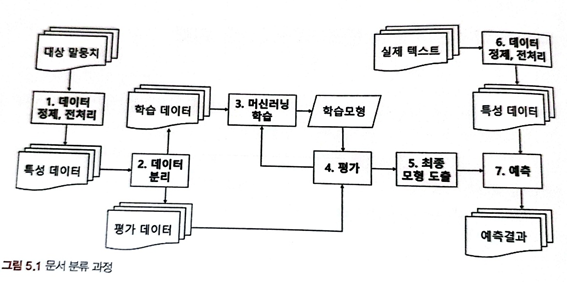

In [22]:
from IPython.display import Image
# Image(filename= './img/ch5/문서분류.PNG')
Image(filename= '문서분류.PNG')

## 3. 나이브 베이즈 분류기(Naive Bayse Classifier)를 이용한 문서 분류

1. http://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html

* 나이브 베이즈 모델 
    * 각 분류에 속한 기사들의 수를 이용해 사전 확률을 계산
        * ex. 학습 데이터셋 분포, 경제 기사 5개 중 3개, 과학 기사 5개 중 2개 
            * 경제기사 사전 확률: 3/5
            * 과학기사 사전 확률: 2/5 
    * 특성을 고려해 이를 더 정확한 확률로 바꿈
        * 학습 데이터셋 통해 어떤 단어가 경제 기사에서 더 많이 나오는지 파악
            * ex. 인플레이션 -> 경제 기사 
        * 새로운 기사에 나온 단어들이 각각 어떤 확률로 경제 관련 기사와 과학 기사에 나오는지 계산 
        * 확률을 잘 결합하여, 새로운 기사가 어느 분류에 속하는지 분류 

In [23]:
#----------------------------------------
# Mutinomial NB를 이용해 20 뉴스그룹 기사들을 분류 

# sklearn.naive_bayes (*나이브 베이즈를 위한 클래스)
    # MultinomialNB
        # 이산적인 특성 값들을 이용해 분류 
        # ex. 이산형 값) 카운트 벡터
        # but, TF-IDF와 같은 연속적 값에서도 잘 작동 
    # BernouliNB
        # 특성 값이 이진 값일때 주로 사용 

# 과정
    # MultinomialNB를 불러와서 객체 생성 
    # 학습 (fit)
        # 특성 데이터와 라벨을 이용해 학습 
            # X_train_cv:  카운트 벡터로 추출된 특성 
            # y_Train: 해당 문서에 대한 분류 
    #  학습/평가 데이터셋에 대해 정확도 계산 
        # Score()
            # 정확도 반환
            # 예측을 위한 특성값, 라벨 모두 필요 -> 모두 인자로 전달 
#----------------------------------------
from sklearn.naive_bayes import MultinomialNB #sklearn이 제공하는 MultinomialNB 를 사용
NB_clf = MultinomialNB() # 분류기 선언

NB_clf.fit(X_train_cv, y_train) #train set을 이용하여 분류기(classifier)를 학습

print('Train set score: {:.3f}'.format(NB_clf.score(X_train_cv, y_train))) #train set에 대한 예측정확도를 확인
print('Test set score: {:.3f}'.format(NB_clf.score(X_test_cv, y_test))) #test set에 대한 예측정확도를 확인

# Train set score > Test set score 
# 두 값의 차이가 크다면 과적합: 학습 데이터에 과하게 학습되어 일반화 성능이 떨어지는 경우

Train set score: 0.824
Test set score: 0.732


In [24]:
#----------------------------------------
# predict()
    # 주어진 텍스트에 대해 분류를 예측
    # 예측에는 라벨값 필요 X, 특성 값만 인수로 전달 
    # 결과: 숫자 
    # 실제 카테고리: newsgroups_train.target_names 를 이용  
#----------------------------------------

print('#First document and label in test data:', X_test[0], y_test[0])
print('#Second document and label in test data:', X_test[1], y_test[1])

pred = NB_clf.predict(X_test_cv[:2])

print('#Predicted labels:', pred)
print('#Predicted categories:', newsgroups_train.target_names[pred[0]], newsgroups_train.target_names[pred[1]])
 
# 결과 개선
    # 1. CountVectorizer , max_features, min_df, max_df 등 매개변수 변경 
    # 2. MultinomialNB 매개변수 조절 
        # alpha: 모델의 복잡도를 조절 
        # alpha 증가: 통계 데이터 완만, 복잡도가 낮아짐 
    # 3. 나이브 베이즈 외의 다른 머신러닝 알고리즘 시도 
    # 4. TfidfVectorizer 사용 

#First document and label in test data: TRry the SKywatch project in  Arizona. 2
#Second document and label in test data: The Vatican library recently made a tour of the US.
 Can anyone help me in finding a FTP site where this collection is 
 available. 1
#Predicted labels: [2 1]
#Predicted categories: sci.space comp.graphics


In [25]:
from sklearn.feature_extraction.text import TfidfVectorizer

#CountVectorizer와 동일한 인수를 사용
tfidf = TfidfVectorizer(max_features=2000, min_df=5, max_df=0.5) 
X_train_tfidf = tfidf.fit_transform(X_train) # train set을 변환
X_test_tfidf = tfidf.transform(X_test) # test set을 변환

NB_clf.fit(X_train_tfidf, y_train) #tfidf train set을 이용하여 분류기(classifier)를 새로 학습
print('Train set score: {:.3f}'.format(NB_clf.score(X_train_tfidf, y_train))) #train set에 대한 예측정확도를 확인
print('Test set score: {:.3f}'.format(NB_clf.score(X_test_tfidf, y_test))) #test set에 대한 예측정확도를 확인

Train set score: 0.862
Test set score: 0.741


In [26]:
#----------------------------------------
# 카테고리별로 계수가 큰 10개의 특성을 추출해 출력 
    # 분류에 대한 예측: 특정 단어들이 기여함 
    # 네 카테고리별로 영향을 많이 미친 특성, 단어를 알고 싶다면 
    # 특성에 대해 학습된 계수를 보면 됨 
#----------------------------------------
import numpy as np

def top10_features(classifier, vectorizer, categories):
    feature_names = np.asarray(vectorizer.get_feature_names_out())
    for i, category in enumerate(categories):
        # 역순으로 정렬하기 위해 계수에 음수를 취해서 정렬 후 앞에서부터 10개의 값을 반환
        top10 = np.argsort(-classifier.coef_[i])[:10]
        # 카테고리와 영향이 큰 특성 10개를 출력
        print("%s: %s" % (category, ", ".join(feature_names[top10])))

top10_features(NB_clf, tfidf, newsgroups_train.target_names) 

# atheism: 무신론/ 상위 10 개 단어: you, not, are, be, this, have, as, what, they, if
# graphics: you, on, **graphics**, this, have, any, can, or, with, thanks
# 나이브 베이즈에서의 coef_는 결과를 해석하지 쉽지 않음 
# sklearn 1.1 버전부터 MultinomialNB 클래스에 대해 coef_가 더 이상 지원 X
# coef_를 이용한 단어의 영향에 대한 분석: 로지스틱 회귀분석 계열에서 주로 사용 

alt.atheism: you, not, are, be, this, have, as, what, they, if
comp.graphics: you, on, graphics, this, have, any, can, or, with, thanks
sci.space: space, on, you, be, was, this, as, they, have, are
talk.religion.misc: you, not, he, are, as, this, be, god, was, they


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:103: FutureWarning: Attribute `coef_` was deprecated in version 0.24 and will be removed in 1.1 (renaming of 0.26).
  warnings.warn(msg, category=FutureWarning)


## 4. 로지스틱 회귀분석을 이용한 문서 분류

1: http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

* 로지스틱 회귀분석
    * 휘귀분석에 기반한 분류 알고리즘 
    * 예측 라벨이 분류(class)에 해당할 때 사용 <-> 일반 회귀(연속 y값)
    * 분류가 이진(binary)/ 셋 이상의 다중 클래스(multi-class) 다른 알고리즘 사용 

* 사이킷런 LogisticRegression 클래스
     * 객체 선언 
     * fit() : 학습
     * scroe(): 정확도
     * predict(): 예측 값 반환 
     * coef_ 

In [27]:
from sklearn.linear_model import LogisticRegression #sklearn이 제공하는 logistic regression을 사용

#count vector에 대해 regression을 해서 NB와 비교
LR_clf = LogisticRegression() #분류기 선언
LR_clf.fit(X_train_tfidf, y_train) # train data를 이용하여 분류기를 학습
print('Train set score: {:.3f}'.format(LR_clf.score(X_train_tfidf, y_train))) # train data에 대한 예측정확도 
print('Test set score: {:.3f}'.format(LR_clf.score(X_test_tfidf, y_test))) # test data에 대한 예측정확도

# 나이브 베이즈보다 떨어진 성능 
    # 1. 나이브 베이즈의 가정: 텍스트 분류 환경가 잘 맞아, 일반적 텍스트 분류에서 좋은 성능을 보여줌 
    # 2. 두 알고리즘 성능 비교, 학습 vs 평가 데이터 성능 차이가 로지스틱에서 더 큼, 과적합의 가능성 
    # 과적합 방지 
        # 특성의 수를 줄임 
        # 정규화를 이용해 각 특성에 대한 계수가 지나치게 커지는 것을 방지 
        # 현재 특성 : 2,000 // 학습 데이터 수 (2.034개)비해 너무 많음 
        # but, 텍스트 분석에서는 특성이 많음에도 좋은 성능을 보이는 경우가 많음

Train set score: 0.930
Test set score: 0.734


### 릿지 회귀(ridge regression)


In [28]:
#----------------------------------------
# 5.4.1 릿지 회귀를 이용한 과적합 방지 
# Ridge Regression 
    # 회귀분석에 정규화를 사용하는 알고리즘 
    # 최적화를 위한 목적합수에 정규화 항목을 넣어, 특성에 대한 계수가 지나치게 커지는 것 억제 

# RidgeClassifier 클래스
    # 매개변수 : 하이퍼 파라미터 
        # 학습을 통해 정해지는 값이 아니라 사용자가 결정하는 값 
    # alpha : 정규화 정도 조절 
        # alpha ↑ : 정규화의 비중 커져, 계수의 변화 억제 
        # alpha 너무 크면, 학습 자체가 잘 안됨, 적절한 값 피룡   
#----------------------------------------

from sklearn.linear_model import RidgeClassifier

ridge_clf = RidgeClassifier() #릿지 분류기 선언
ridge_clf.fit(X_train_tfidf, y_train) #학습
print('Train set score: {:.3f}'.format(ridge_clf.score(X_train_tfidf, y_train)))
print('Test set score: {:.3f}'.format(ridge_clf.score(X_test_tfidf, y_test)))

# 적절한 alpha를 조정, 성능을 개선
# 적절한 alpha를 찾기 위해 학습 데이터 다시 분리해 검증(validation) 데이터셋 만듦 
# 검증 데이터셋에 대한 성능이 최고가 되는 alpha 선택 

Train set score: 0.960
Test set score: 0.735


In [29]:
#----------------------------------------
# GridSearch 구현 
    # 다양한 하이퍼 파라미터 값에 대해 검증 데이터셋에 대한 성능을 계산 
    # 적절한 하이퍼 파라미터 값을 얻음 
# 검증 데이터셋(validation)
    # sklearn, train_test_split 을 이용해 학습 데이터 분리 
    # alpha 값을 0.1~ 10 까지 0.1씩 증가시키며 릿지 회귀 실시 
    # 성능이 가장 큰 모형의 alpha 찾음 
    # 보통: alpha(log scale) 0.001, 0.01, 0.1,1,10, 100 많이 사용 

#----------------------------------------
import numpy as np
from sklearn.model_selection import train_test_split

X_train_ridge, X_val_ridge, y_train_ridge, y_val_ridge = train_test_split(
    X_train_tfidf, y_train, test_size=0.2, random_state=42)

max_score = 0
max_alpha = 0
for alpha in np.arange(0.1, 10, 0.1): # alpha를 0.1부터 10까지 0.1씩 증가
    ridge_clf = RidgeClassifier(alpha=alpha) #릿지 분류기 선언
    ridge_clf.fit(X_train_ridge, y_train_ridge) #학습
    score = ridge_clf.score(X_val_ridge, y_val_ridge) #검정 데이터셋에 대해 정확도를 측정
    if score > max_score: #정확도가 이전의 정확도 최대값보다 크면 최대값을 변경한다.
        max_score = score
        max_alpha = alpha
print('Max alpha {:.3f} at max validation score {:.3f}'.format(max_alpha, max_score))

Max alpha 1.600 at max validation score 0.826


In [30]:
ridge_clf = RidgeClassifier(alpha=1.6) #릿지 분류기 선언
ridge_clf.fit(X_train_tfidf, y_train) #학습

print('Train set score: {:.3f}'.format(ridge_clf.score(X_train_tfidf, y_train)))
print('Test set score: {:.3f}'.format(ridge_clf.score(X_test_tfidf, y_test)))

Train set score: 0.948
Test set score: 0.739


In [31]:
top10_features(ridge_clf, tfidf, newsgroups_train.target_names)

# coef_를 통한 상위 특성, 로지스틱 회귀분석에서는 설명이 해석하기 편함 

alt.atheism: bobby, religion, atheism, atheists, motto, punishment, islam, deletion, islamic, satan
comp.graphics: graphics, computer, 3d, file, image, hi, 42, using, screen, looking
sci.space: space, orbit, nasa, spacecraft, moon, sci, launch, flight, funding, idea
talk.religion.misc: christian, christians, fbi, blood, order, jesus, objective, children, christ, hudson


### 라쏘 회귀분석(lasso regression)을 이용한 특성 선택(feature selection)

1. http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html

In [32]:
#----------------------------------------
# 5.4.2 라쏘 회귀를 이용한 특성 선택 

# Lasso Regression 
    # 특성의 계수에 대해 정규화 
    # 정규화 항에 차이가 있음 (릿지: L2 정규화, 라쏘: L1 정규화)
    # 특성의 계수가 0에 가까워지면 이를 완전히 0으로 바꿈 
    # 특성의 계수 0: 실제로 분류에 전혀 영향을 미치지 않으며, 그 특성 값이 사용되지 않는다는 것을 의미 
    # 특성의 수를 줄이는 결과를 가짐 -> 과적합 방지, 정보량/정확도도 같이 줄어듦

# 별도의 분류기 제공 X
# 로지스틱 회귀분석에서 정규화 방식을 L1으로 선택하도록 함으로써 지원 
# 동시에 'liblinear' 를 선택해야 함 
# 매개변수
    # c: alpha의 역수 
    # c↑: 정규화가 약해짐 
#----------------------------------------

lasso_clf = LogisticRegression(penalty='l1', solver='liblinear', C=1) # Lasso는 동일한 LogisticRegression을 사용하면서 매개변수로 지정
lasso_clf.fit(X_train_tfidf, y_train) # train data로 학습

print('#Train set score: {:.3f}'.format(lasso_clf.score(X_train_tfidf, y_train)))
print('#Test set score: {:.3f}'.format(lasso_clf.score(X_test_tfidf, y_test)))

# 계수(coefficient) 중에서 0이 아닌 것들의 개수를 출력
print('#Used features count: {}'.format(np.sum(lasso_clf.coef_ != 0)), 'out of', X_train_tfidf.shape[1]) 

# Used features count: 437 out of 2000/ 사용 특성 줄어듦 
# 라쏘 : 특성의 수를 줄임(특성 선택, feature selection)
# 연관성이 떨어지는 특성 배제, 중요한 특성에 집중 

#Train set score: 0.819
#Test set score: 0.724
#Used features count: 437 out of 2000


In [33]:
# 특성의 수를 줄이고, 특성에 대한 설명을 더 잘하기 위해 lasso 많이 사용됨 
top10_features(lasso_clf, tfidf, newsgroups_train.target_names)

alt.atheism: bobby, atheism, atheists, islam, religion, islamic, motto, atheist, satan, vice
comp.graphics: graphics, image, 3d, file, computer, hi, video, files, looking, sphere
sci.space: space, orbit, launch, nasa, spacecraft, flight, moon, dc, shuttle, solar
talk.religion.misc: fbi, christian, christians, christ, order, jesus, children, objective, context, blood


## 5. 결정트리 등을 이용한 기타 문서 분류 방법

1. https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
2. https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
3. https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html

* 결정 트리
    * 모형이 학습되면 결정트리를 그려서 분류가 되는 과정을 살펴볼 수 있음 -> 체계적 설명 가증 
    * 특성이 너무 많은 경우, 그려서 보기 쉽지 않음 
    * 특성의 수 비롯한 여거 가지 고려해야 함 

* DecisionTreeClssifier
* RandomForestClassifier
    * 결정트리 기반의 앙상블 모형 
* GradientBoostingClassifier
    * 결정트리 기반의 모형 중에서 높은 성능

In [34]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

tree = DecisionTreeClassifier(random_state=7)
tree.fit(X_train_tfidf, y_train)
print('#Decision Tree train set score: {:.3f}'.format(tree.score(X_train_tfidf, y_train)))
print('#Decision Tree test set score: {:.3f}'.format(tree.score(X_test_tfidf, y_test)))

forest = RandomForestClassifier(random_state=7)
forest.fit(X_train_tfidf, y_train)
print('#Random Forest train set score: {:.3f}'.format(forest.score(X_train_tfidf, y_train)))
print('#Random Forest test set score: {:.3f}'.format(forest.score(X_test_tfidf, y_test)))

gb = GradientBoostingClassifier(random_state=7)
gb.fit(X_train_tfidf, y_train)
print('#Gradient Boosting train set score: {:.3f}'.format(gb.score(X_train_tfidf, y_train)))
print('#Gradient Boosting test set score: {:.3f}'.format(gb.score(X_test_tfidf, y_test)))

# 결정 트리 : 과적합되는 경향 강함 
# 최적화를 위한 하이퍼파라미터 탐색 필요 & 문석 분류의 경우 결정트리 기반 알고리즘 좋은 성능 X 

#Decision Tree train set score: 0.977
#Decision Tree test set score: 0.536
#Random Forest train set score: 0.977
#Random Forest test set score: 0.685
#Gradient Boosting train set score: 0.933
#Gradient Boosting test set score: 0.696


In [35]:
# 나이브 베이즈, 로지스틱 회귀분석과 다르게 feature_importances_를 제공 
# 결정트리: 성격이 비슷한 두 단어 중 하나가 분류에 먼저 사용되면, 다른 단어는 상대적으로 중요도가 떨어짐 
# 로지스틱 회귀분석: 두 단어가 비슷한 계숫값을 가져도 경정트리에서 완전 다른 값 가질 수 있음 
sorted_feature_importances = sorted(zip(tfidf.get_feature_names_out(), gb.feature_importances_), key=lambda x: x[1], reverse=True)
for feature, value in sorted_feature_importances[:40]:
    print('%s: %.3f' % (feature, value), end=', ')

space: 0.126, graphics: 0.080, atheism: 0.024, thanks: 0.023, file: 0.021, orbit: 0.020, jesus: 0.018, god: 0.018, hi: 0.017, nasa: 0.015, image: 0.015, files: 0.014, christ: 0.010, moon: 0.010, bobby: 0.010, launch: 0.010, looking: 0.010, christian: 0.010, atheists: 0.009, christians: 0.009, fbi: 0.009, 3d: 0.008, you: 0.008, not: 0.008, islamic: 0.007, religion: 0.007, spacecraft: 0.007, flight: 0.007, computer: 0.007, islam: 0.007, ftp: 0.006, color: 0.006, software: 0.005, atheist: 0.005, card: 0.005, people: 0.005, koresh: 0.005, his: 0.005, kent: 0.004, sphere: 0.004, 

## 06. 성능을 높이기 위한 방법들
* 1. 토큰화, 정규화 
    * CountVectorizer, TfidfVectorizer , 자체 토크나이저 및 외부에서 정으히나 ㅎ마수 사용 
    * 토크나이저 향상
        * 정규표현식 토크나이저 
            * NLTK의 불용어 사전 이용해 불용어 제거
            * 포터 스테머를 사용해 스테밍 수행 
* TfidfVectorizer 에 이 토큰화 결과 입력해 나온 특성 벡터로 로지스틱 회귀분석 실시 

In [36]:
# 필요한 library들을 import
from nltk.corpus import stopwords
cachedStopWords = stopwords.words("english")

from nltk.tokenize import RegexpTokenizer
from nltk.stem.porter import PorterStemmer
import re

RegTok = RegexpTokenizer("[\w']{3,}") # 정규포현식으로 토크나이저를 정의
english_stops = set(stopwords.words('english')) #영어 불용어를 가져옴

def tokenizer(text):
    tokens = RegTok.tokenize(text.lower()) #이렇게 해도 되는지 확인
    # stopwords 제외
    words = [word for word in tokens if (word not in english_stops) and len(word) > 2]
    # portr stemmer 적용
    features = (list(map(lambda token: PorterStemmer().stem(token),words)))
    return features

tfidf = TfidfVectorizer(tokenizer=tokenizer, max_features=2000, min_df=5, max_df=0.5) # 새로 정의한 토크나이저 사용
X_train_tfidf = tfidf.fit_transform(X_train) # train set을 변환
X_test_tfidf = tfidf.transform(X_test) # test set을 변환

#tfidf vector를 이용해서 분류기 학습
LR_clf = LogisticRegression() #분류기 선언
LR_clf.fit(X_train_tfidf, y_train) # train data를 이용하여 분류기를 학습
print('#Train set score: {:.3f}'.format(LR_clf.score(X_train_tfidf, y_train))) # train data에 대한 예측정확도 
print('#Test set score: {:.3f}'.format(LR_clf.score(X_test_tfidf, y_test))) # test data에 대한 예측정확도

#Train set score: 0.930
#Test set score: 0.751


In [37]:
len(LR_clf.coef_[0])

2000

In [38]:
#----------------------------------------
# 그리드 서치로 적정 alpha : 2.4 구함 
# 릿지 회귀분석 실시 
#----------------------------------------
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(tokenizer=tokenizer)

X_train_tfidf = tfidf.fit_transform(X_train) # train set을 변환
print('#Train set dimension:', X_train_tfidf.shape) # 실제로 몇개의 특성이 사용되었는지 확인
X_test_tfidf = tfidf.transform(X_test) # test set을 변환
print('#Test set dimension:', X_test_tfidf.shape)

ridge_clf = RidgeClassifier(alpha=2.4)
ridge_clf.fit(X_train_tfidf, y_train) #학습
print('#Train set score: {:.3f}'.format(ridge_clf.score(X_train_tfidf, y_train)))
print('#Test set score: {:.3f}'.format(ridge_clf.score(X_test_tfidf, y_test)))

NB_clf = MultinomialNB(alpha=0.01) # 분류기 선언
NB_clf.fit(X_train_tfidf, y_train) #train set을 이용하여 분류기(classifier)를 학습
print('#Train set score: {:.3f}'.format(NB_clf.score(X_train_tfidf, y_train))) #train set에 대한 예측정확도를 확인
print('#Test set score: {:.3f}'.format(NB_clf.score(X_test_tfidf, y_test))) #test set에 대한 예측정확도를 확인

#Train set dimension: (2034, 20085)
#Test set dimension: (1353, 20085)
#Train set score: 0.968
#Test set score: 0.768
#Train set score: 0.971
#Test set score: 0.793


## 07. 카운트 기반의 문제점과 N-gram

In [39]:
#----------------------------------------
# 5.7.1 통계로는 알 수 없는 문맥 정보 
# BOW(Bag of Words)의 단점 
    # 단어들이 쓰여진 순서에 딸느 문맥 정보 이용 X 
    # 단어 순서 무시, 단어가 사용된 횟수 기반으로 문서 벡터 생성 
    # 문맥 파악: sequence 표현해 사용 
        # 딥러닝 기법 (단어가 쓰여진 순서 반영, N-gram)
#----------------------------------------

#----------------------------------------
# 5.7.2 N-gram 이해 
# N-gram
    # n개의 연속적인 단어들의 나열
        # n=1, unigram: 보통, 토큰은 하나의 단어, 의미가 있는 가장 작은 단위로 만들어짐
        # n=2, bi-gram : 하나의 토큰은 두 개 이상의 단어로 구성 
        # n=3, tri-gram

# 언어 모델
    # 문장 혹은 시퀀스에 대한 확률을 할당하는 모델
    # 이때 확률은 말뭉치에 나타난 단어 시퀀스의 빈도와 관련이 있음 
#----------------------------------------

In [40]:
#----------------------------------------
# 5.7.3 N-gram을 이용한 문서 분류 
    # uni-gram, bi-gram, tri-gram
    # uni-gram : TfidfVectorizer 객체 생성, 변환, tf-idf 벡터의 크기 확인 
    # n-gram 에 따른 벡터의 크기 확인을 위해 max_features를 사용하지 않음 
    # + 토큰화를 위한 정규식 인수로 주고, nltk 불용어 사전 이용   
#----------------------------------------
cachedStopWords = stopwords.words("english")
tfidf = TfidfVectorizer(token_pattern= "[a-zA-Z']{3,}", # 토큰화를 위한 정규식
                        decode_error ='ignore', 
                        lowercase=True, 
                        stop_words = stopwords.words('english'), 
                        max_df=0.5,
                        min_df=2)
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

print(X_train_tfidf.shape) 
# 단어: 11,483 , n-gram 사용하면 변수 늘어나고, 이로 인해 과적합의 우려가 있음 -> 릿지 회귀 사용 (정규화)

(2034, 11483)


In [41]:
from sklearn.linear_model import RidgeClassifier
ridge_clf = RidgeClassifier() #릿지 분류기 선언
ridge_clf.fit(X_train_tfidf, y_train) #학습
print('Train set score: {:.3f}'.format(ridge_clf.score(X_train_tfidf, y_train)))
print('Test set score: {:.3f}'.format(ridge_clf.score(X_test_tfidf, y_test)))

Train set score: 0.976
Test set score: 0.766


In [42]:
#----------------------------------------
# bi-gram 사용
# TfidVectorizer
    # ngram_range 매개변수
        # (시작 N, 끝 N)
            # ex1. (1,2) : unigram, bigram 모두 사용 
            # ex2. (2,2) : bigram 만 사용  
#----------------------------------------

tfidf = TfidfVectorizer(token_pattern= "[a-zA-Z']{3,}", 
                        decode_error ='ignore', 
                        lowercase=True, 
                        stop_words = stopwords.words('english'),
                        ngram_range=(1, 2), # 바이그램 설정
                        max_df=0.5,
                        min_df=2)
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

print(X_train_tfidf.shape)

(2034, 26550)


In [43]:
#----------------------------------------
# 특성 이름 출력, 릿지 회귀분석으로 학습한 후 결과 확인
#----------------------------------------
bigram_features = [f for f in tfidf.get_feature_names_out() if len(f.split()) > 1]
print('bi-gram samples:', bigram_features[:10])

ridge_clf.fit(X_train_tfidf, y_train) #학습
print('Train set score: {:.3f}'.format(ridge_clf.score(X_train_tfidf, y_train)))
print('Test set score: {:.3f}'.format(ridge_clf.score(X_test_tfidf, y_test)))

bi-gram samples: ["'cause can't", "'em better", "'expected errors'", "'karla' next", "'nodis' password", "'official doctrine", "'ok see", "'sci astro'", "'what's moonbase", 'aas american']
Train set score: 0.976
Test set score: 0.773


In [44]:
tfidf = TfidfVectorizer(token_pattern= "[a-zA-Z']{3,}", 
                        decode_error ='ignore', 
                        lowercase=True, 
                        stop_words = stopwords.words('english'),
                        ngram_range=(1, 3),
                        max_df=0.5,
                        min_df=2)
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)
print(X_train_tfidf.shape)

trigram_features = [f for f in tfidf.get_feature_names_out() if len(f.split()) > 2]
print('tri-gram samples:', trigram_features[:10])

ridge_clf.fit(X_train_tfidf, y_train) #학습
print('Train set score: {:.3f}'.format(ridge_clf.score(X_train_tfidf, y_train)))
print('Test set score: {:.3f}'.format(ridge_clf.score(X_test_tfidf, y_test)))

(2034, 32943)
tri-gram samples: ["'em better shots", "'expected errors' basically", "'karla' next one", "'nodis' password also", "'official doctrine think", "'ok see warning", "'what's moonbase good", 'aas american astronautical', 'ability means infallible', 'able accept donations']
Train set score: 0.976
Test set score: 0.775


## 8. 한글 문서의 분류
* 영어 문서
    * 사이킷런 : 기본 토크나이저 사용 가능 
* 한글 문서
    * 별도의 토크나이저 지정 

In [46]:
#----------------------------------------
# 5.8.1 다음 영화 리뷰에 대한 영화 제목 예측 
    # 다음 무비 영화 리뷰 이용 
    # 영화 리뷰의 내용을 분석해 영화의 제목을 예측하는 분류기 생성 
#----------------------------------------
import pandas as pd
df = pd.read_csv('./review.csv')
df.head(5)

,review,rating,date,title
0,돈 들인건 티가 나지만 보는 내내 하품만,1,2018.10.29,인피니티 워
1,몰입할수밖에 없다. 어렵게 생각할 필요없다. 내가 전투에 참여한듯 손에 땀이남.,10,2018.10.26,인피니티 워
2,이전 작품에 비해 더 화려하고 스케일도 커졌지만.... 전국 맛집의 음식들을 한데 ...,8,2018.10.24,인피니티 워
3,이 정도면 볼만하다고 할 수 있음!,8,2018.10.22,인피니티 워
4,재미있다,10,2018.10.20,인피니티 워


In [47]:
#----------------------------------------
# 어떤 영화, 각 영화별 리뷰의 수 
    # 데이터셋 불균형(imbalanced dataset)
    # : 데이터셋의 개수가 많이 차이남 
    
    # 불균형 데이터셋 문제 해결
        # 1. 언더 샘플링을 통해 갯수가 많은 분류들의 데이터 수를 적은 분류의 수에 맞춤 
        # 2. 오버 샘플링 이용해 데이터 수가 적은 분류의 수를 늘림 
#----------------------------------------
df.title.value_counts()

신과함께      4947
택시운전사     2322
인피니티 워    2042
범죄도시      1939
곤지암       1547
라라랜드      1150
코코         778
Name: title, dtype: int64

In [48]:
#----------------------------------------
# train_test_split
    # 학습 , 평가 셋으로 분리
    # 데이터셋 크기 확인 
#----------------------------------------
from sklearn.model_selection import train_test_split

# split data and labels into a training and a test set
X_train, X_test, y_train, y_test = train_test_split(df.review, df.title, random_state=0)
# 비율을 지정하지 않으면 75:25로 분할됨
print('#Train set size:', len(X_train)) # 실제로 몇개의 특성이 사용되었는지 확인
print('#Test set size:', len(X_test))

#Train set size: 11043
#Test set size: 3682


In [49]:
#----------------------------------------
# KoNLPy : 다섯개의 형태소 분석기 제공 
# 가장 잘 맞는 형태소 분석기 선택 
#----------------------------------------
from konlpy.tag import Okt #konlpy에서 Twitter 형태소 분석기를 import
#from konlpy.tag import Twitter #konlpy에서 Twitter 형태소 분석기를 import
okt = Okt()

print(okt.morphs(X_train[1])) #둘째 리뷰에 대해 형태소 단위로 tokenize
print(okt.nouns(X_train[1])) #둘째 리뷰에서 명사만 추출

['몰입', '할수밖에', '없다', '.', '어렵게', '생각', '할', '필요없다', '.', '내', '가', '전투', '에', '참여', '한', '듯', '손', '에', '땀', '이남', '.']
['몰입', '생각', '내', '전투', '참여', '듯', '손', '땀', '이남']


In [50]:
#----------------------------------------
# okt.nouns()를 이용해 명사만 사용 
# 로지스틱 회귀분석 수행 

# LogisticRegression
    # max_iter 매개변수: 1,000
    # 매개변수의 default 값: 100
    # 기본값으로 실행할 경우 충분히 수렴되지 않았다는 warnings 발생 
#----------------------------------------
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

#Twitter 형태소분석기에서 명사만 추출하는 함수를 tokenizer로 이용
tfidf = TfidfVectorizer(tokenizer=okt.nouns, max_features=2000, min_df=5, max_df=0.5) 

X_train_tfidf = tfidf.fit_transform(X_train) # train data 변환 -> tfidf vector
X_test_tfidf = tfidf.transform(X_test) # test data 변환 -> tfidf vector

# logistic regression 분류기 선언
clf = LogisticRegression(max_iter=1000) # 충분한 학습을 위해 max_iter를 1,000으로 설정, 기본은 100
clf.fit(X_train_tfidf, y_train) # 분류기 학습
print('#Train set score: {:.3f}'.format(clf.score(X_train_tfidf, y_train))) # train data 예측정확도
print('#Test set score: {:.3f}'.format(clf.score(X_test_tfidf, y_test))) # test data 예측정확도

#Train set score: 0.756
#Test set score: 0.694


In [51]:
#----------------------------------------
# Test set 실제 앞 10개의 리뷰에 대한 영화제목, 예측 제목, 리뷰 
#----------------------------------------
print('실제영화제목, 예측한 제목, 리뷰')
for content in zip(y_test[:10], clf.predict(X_test_tfidf[:10]), X_test[:10]):
    print(content)

실제영화제목, 예측한 제목, 리뷰
('범죄도시', '신과함께', '오랜만에 잼나는 영화 봤습니다.  다음에 더 재미있는 영화 기대하겠습니다.')
('범죄도시', '범죄도시', '조연들이 눈에 박힌다. 간만에 집중 ㅎ')
('코코', '코코', '대감동을 선사. 인사이드 아웃을 잇는 픽사의 감동스토리. 신과함께의 멕시코판이라고나할까요??')
('신과함께', '신과함께', '돈이 안아까웠던 영화ᆞᆞ  정말 좋았다')
('신과함께', '신과함께', '역시 김용화감독이 영화는 잘 만들어요. 이제 VFX 제작 부문도 헐리우드 수준 이상입니다.')
('택시운전사', '택시운전사', '민주화를 위해 힘써주신 분들께 감사하는 마음으로 살아야겠다.')
('신과함께', '신과함께', '잠만 자다 왔음')
('신과함께', '신과함께', '오랜만에 잼있고 좋은 영화를 봤다')
('범죄도시', '신과함께', '잼남')
('범죄도시', '인피니티 워', '대박~~')


### 성능을 개선하기 위한 노력


In [52]:
#----------------------------------------
# 5.8.2 성능을 개선하기 위한 노력 
# 1. 형태소 분석 
    # 모든 품사 사용 
    # 명사, 동사, 형용사만 선별 
#----------------------------------------
tfidf = TfidfVectorizer(tokenizer=okt.morphs, max_features=2000, min_df=5, max_df=0.5) # 명사 대신 모든 형태소를 사용
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

clf = LogisticRegression(max_iter=1000) # 충분한 학습을 위해 max_iter를 1,000으로 설정, 기본은 100
clf.fit(X_train_tfidf, y_train)
print('#Train set score: {:.3f}'.format(clf.score(X_train_tfidf, y_train))) # train data 예측정확도
print('#Test set score: {:.3f}'.format(clf.score(X_test_tfidf, y_test))) # test data 예측정확도

#Train set score: 0.777
#Test set score: 0.695


In [53]:
#----------------------------------------
# twit_tokenizer 함수 
    # 명사, 동사, 형용사만 선별 
    # 해당 함수를 이용한 특성 추출 후 분류 
#----------------------------------------
def twit_tokenizer(text): #전체를 다 사용하는 대신, 명사, 동사, 형용사를 사용
    target_tags = ['Noun', 'Verb', 'Adjective']
    result = []
    for word, tag in okt.pos(text, norm=True, stem=True):
        if tag in target_tags:
            result.append(word)
    return result

tfidf = TfidfVectorizer(tokenizer=twit_tokenizer, max_features=2000, min_df=5, max_df=0.5) #명사, 동사, 형용사를 이용하여 tfidf 생성
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

clf = LogisticRegression(max_iter=1000) # 충분한 학습을 위해 max_iter를 1,000으로 설정, 기본은 100
clf.fit(X_train_tfidf, y_train)
print('#Train set score: {:.3f}'.format(clf.score(X_train_tfidf, y_train))) # train data 예측정확도
print('#Test set score: {:.3f}'.format(clf.score(X_test_tfidf, y_test))) # test data 예측정확도

#Train set score: 0.784
#Test set score: 0.712


In [54]:
#----------------------------------------
# twit_tokenizer2 함수 
    # 모든 품사 이용할 경우, 같은 단어가 서로 다른 품사로 사용된 경우를 구분하지 못함 
    # 따라서, 단어에 품사명을 붙여 하나의 단어로 만듦 
#----------------------------------------

# 모든 형태소를 다 사용하고 품사를 알 수 있도록 하면?
def twit_tokenizer2(text):
    result = []
    for word, tag in okt.pos(text, norm=True, stem=True):
        result.append('/'.join([word, tag])) #단어의 품사를 구분할 수 있도록 함
    return result

print(twit_tokenizer2(X_train[1]))

['몰입/Noun', '하다/Verb', '없다/Adjective', './Punctuation', '어렵다/Adjective', '생각/Noun', '하다/Verb', '필요없다/Adjective', './Punctuation', '내/Noun', '가/Josa', '전투/Noun', '에/Josa', '참여/Noun', '한/Determiner', '듯/Noun', '손/Noun', '에/Josa', '땀/Noun', '이남/Noun', './Punctuation']


In [55]:
#----------------------------------------
# 명사, 동사, 형용사만 선택하고 거기에 품사를 붙여 모델 수행  
#----------------------------------------

In [56]:
tfidf = TfidfVectorizer(tokenizer=twit_tokenizer2, max_features=2000, min_df=5, max_df=0.5)
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

clf = LogisticRegression(max_iter=1000) # 충분한 학습을 위해 max_iter를 1,000으로 설정, 기본은 100
clf.fit(X_train_tfidf, y_train)
print('#Train set score: {:.3f}'.format(clf.score(X_train_tfidf, y_train))) # train data 예측정확도
print('#Test set score: {:.3f}'.format(clf.score(X_test_tfidf, y_test))) # test data 예측정확도

#Train set score: 0.789
#Test set score: 0.718


In [57]:
#----------------------------------------
# 릿지 그리드 서치 , alpha 값 구함  
#----------------------------------------

import numpy as np
from sklearn.model_selection import train_test_split

X_train_ridge, X_val_ridge, y_train_ridge, y_val_ridge = train_test_split(
    X_train_tfidf, y_train, test_size=0.2, random_state=42)

max_score = 0
max_alpha = 0
for alpha in np.arange(0.1, 10, 0.1): # alpha를 0.1부터 10까지 0.1씩 증가
    ridge_clf = RidgeClassifier(alpha=alpha) #릿지 분류기 선언
    ridge_clf.fit(X_train_ridge, y_train_ridge) #학습
    score = ridge_clf.score(X_val_ridge, y_val_ridge) #검정 데이터셋에 대해 정확도를 측정
    if score > max_score: #정확도가 이전의 정확도 최대값보다 크면 최대값을 변경한다.
        max_score = score
        max_alpha = alpha
print('#Max alpha {:.3f} at max validation score {:.3f}'.format(max_alpha, max_score))

#Max alpha 1.600 at max validation score 0.727


In [58]:
from sklearn.linear_model import RidgeClassifier

# 릿지 회귀분석 
ridge_clf = RidgeClassifier(alpha=1.6)
ridge_clf.fit(X_train_tfidf, y_train)
print('#Ridge Train set score: {:.3f}'.format(ridge_clf.score(X_train_tfidf, y_train)))
print('#Ridge Test set score: {:.3f}'.format(ridge_clf.score(X_test_tfidf, y_test)))

# 라쏘 회귀분석 
from sklearn.linear_model import LogisticRegression
import numpy as np
lasso_clf = LogisticRegression(penalty='l1', solver='liblinear', C=0.5)
lasso_clf.fit(X_train_tfidf, y_train)
print('#Lasso Train set score: {:.3f}'.format(lasso_clf.score(X_train_tfidf, y_train)))
print('#Lasso Test set score: {:.3f}'.format(lasso_clf.score(X_test_tfidf, y_test)))
print('#Used features count: {}'.format(np.sum(lasso_clf.coef_ != 0)), 'out of', X_train_tfidf.shape[1])

#Ridge Train set score: 0.807
#Ridge Test set score: 0.726
#Lasso Train set score: 0.703
#Lasso Test set score: 0.696
#Used features count: 957 out of 2000


In [59]:
from sklearn.naive_bayes import MultinomialNB

NB_clf = MultinomialNB(alpha=0.1)
NB_clf.fit(X_train_tfidf, y_train)
print('Train set score: {:.3f}'.format(NB_clf.score(X_train_tfidf, y_train)))
print('Test set score: {:.3f}'.format(NB_clf.score(X_test_tfidf, y_test)))

Train set score: 0.768
Test set score: 0.704
